In [66]:
import os.path

import matplotlib.pyplot as  plt
import numpy as np 
import cv2
from importlib import reload 
import glob 

# our own utility functions
import  util as u 

reload( u )


<module 'util' from 'C:\\Users\\mrestrepo\\git\\CarND-Advanced-Lane-Lines\\util.py'>

### Camera calibration

We first load a distorted image

img_filename = ./camera_cal\calibration1.jpg ret=False len(corners)=0 len(imgpoints)=0
img_filename = ./camera_cal\calibration10.jpg ret=True len(corners)=54 len(imgpoints)=1
img_filename = ./camera_cal\calibration11.jpg ret=True len(corners)=54 len(imgpoints)=2
img_filename = ./camera_cal\calibration12.jpg ret=True len(corners)=54 len(imgpoints)=3
img_filename = ./camera_cal\calibration13.jpg ret=True len(corners)=54 len(imgpoints)=4
img_filename = ./camera_cal\calibration14.jpg ret=True len(corners)=54 len(imgpoints)=5
img_filename = ./camera_cal\calibration15.jpg ret=True len(corners)=54 len(imgpoints)=6
img_filename = ./camera_cal\calibration16.jpg ret=True len(corners)=54 len(imgpoints)=7
img_filename = ./camera_cal\calibration17.jpg ret=True len(corners)=54 len(imgpoints)=8
img_filename = ./camera_cal\calibration18.jpg ret=True len(corners)=54 len(imgpoints)=9
img_filename = ./camera_cal\calibration19.jpg ret=True len(corners)=54 len(imgpoints)=10
img_filename = ./camera_cal\cali

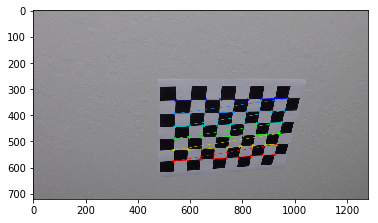

In [83]:
import camera_calibration as cc 

nx = 9 
ny = 6

img_filenames = glob.glob("./camera_cal/calibration*.jpg") 

mtx, dist = cc.calibrate_cam( img_filenames, nx=nx, ny=ny, draw=1)

In [84]:
mtx, dist

(array([[1.15777818e+03, 0.00000000e+00, 6.67113857e+02],
        [0.00000000e+00, 1.15282217e+03, 3.86124583e+02],
        [0.00000000e+00, 0.00000000e+00, 1.00000000e+00]]),
 array([[-0.24688507, -0.02373155, -0.00109831,  0.00035107, -0.00259868]]))

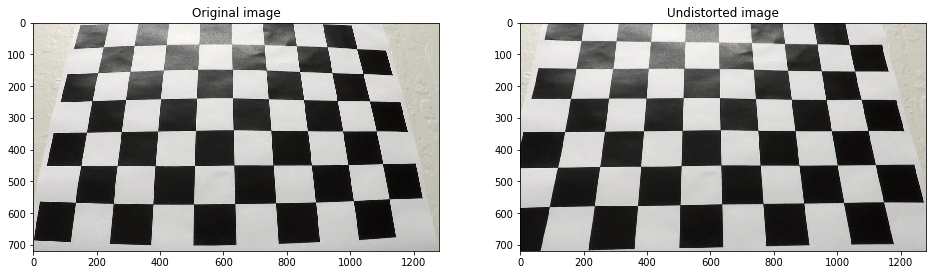

In [104]:
#help( plt.figure )
img = u.rgb_read( './camera_cal/calibration3.jpg' )
undistorted = cv2.undistort(img, mtx, dist, None, mtx)

fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(16,6) )
ax1.set_title( 'Original image')
ax1.imshow( img )
ax2.set_title( 'Undistorted image')
ax2.imshow( undistorted )

## Pipeline (test images) 

In [122]:
test_img_fns = glob.glob( './test_images/*.jpg' ) 

In [ ]:
for img_fn in test_img_fns : 
    img = u.rgb_read( img_fn )
    undistorted = cv2.undistort(img, mtx, dist, None, mtx)    
    name_noext, _ = os.path.splitext( os.path.basename( fn )) 
    cv2.imwrite( 'output_images/' + name_noext + '_undistorted.jpg', undistorted  )

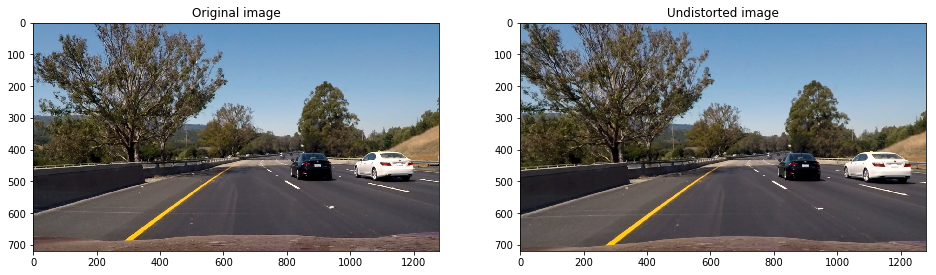

In [124]:
fig, (ax1,ax2) = plt.subplots( 1,2, figsize=(16,6) )
ax1.set_title( 'Original image')
ax1.imshow( img )
ax2.set_title( 'Undistorted image')
ax2.imshow( undistorted )

In [121]:
img_fn

'./output_images\\save_output_here.txt'

In [169]:
import pipeline as p

reload( p )

binary = p.get_lane_pixels( undistorted )

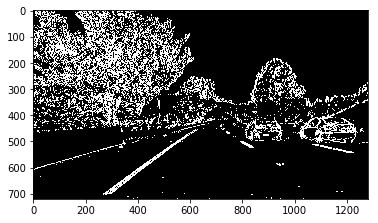

In [219]:
plt.imshow( binary, cmap='gray')

In [ ]:
reload( u )

u.np_describe( img, detail=1 )

In [132]:
img = binary.copy() 

In [306]:
distorted = u.rgb_read( "test_images/straight_lines2.jpg" )
undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)

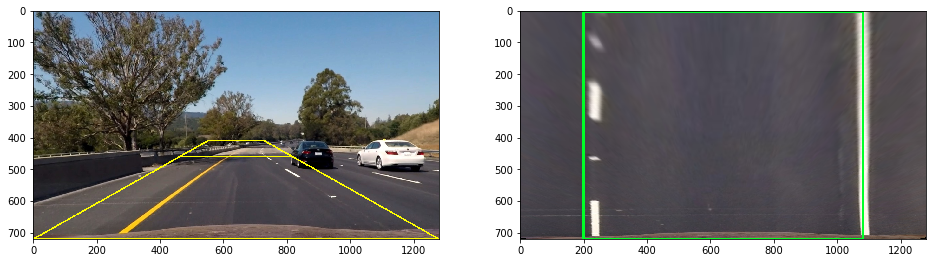

In [307]:
imgc = undistorted.copy()

reload( p )
corners = p.construct_trapezoid( imgc, top_offset = 100, alpha_top = 0.37, alpha_bottom=0.72 )

p.draw_four_corners( imgc, corners )

M, dst_points = p.get_perspective_transform( imgc, corners,offset_x=200 )

warped = p.warp_perspective(undistorted,  M )

p.draw_four_corners( warped, dst_points, color=(0,255, 40), tkn=5 )

u.show2( imgc2, warped )


In [308]:
distorted = u.rgb_read( "test_images/test1.jpg" )
undistorted = cv2.undistort(distorted, mtx, dist, None, mtx)
warped = p.warp_perspective(undistorted,  M )

binary = p.get_lane_pixels( undistorted )

b3 = u.binary2rgb( binary )
warp_bin = p.warp_perspective( b3, M )


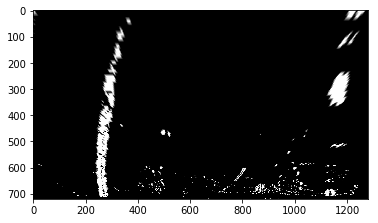

In [309]:
plt.imshow( warp_bin )